<a href="https://colab.research.google.com/github/Karlamch/karlaMCH/blob/main/eii_u2_ep_%3C22150453%3E.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#               **Instituto Tecnológico de México**


---


# **Instituto Tecnológico de Aguascalientes**
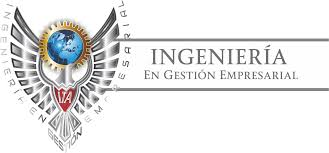


**Estadística Inferencial II**

*EXAMEN UNIDAD 2*

Docente: José Cruz Muñoz Esparza

Alumna: Karla María Macías Chávez

Fecha: 12/04/2025

*INTRODUCCIÓN*

---

Revisar bien estos gráficos nos ayuda a detectar si hay problemas con el modelo, como relaciones no lineales que no se ven, errores que no tienen una varianza constante o errores que no siguen una distribución normal. Es importante encontrar estas cosas porque pueden afectar cómo entendemos los resultados del modelo, si las pruebas estadísticas son confiables y qué tan precisas son las predicciones. Por eso, echarle un buen vistazo a los residuos es clave cuando estamos trabajando con modelos de regresión.



In [2]:
import pandas as pd
import numpy as np

df =pd.read_csv('https://raw.githubusercontent.com/Karlamch/karlaMCH/refs/heads/main/Hipertension_Arterial_Mexico.csv')

df.dropna(inplace = True)
df

,FOLIO_I,sexo,edad,concentracion_hemoglobina,temperatura_ambiente,valor_acido_urico,valor_albumina,valor_colesterol_hdl,valor_colesterol_ldl,valor_colesterol_total,...,segundamedicion_peso,segundamedicion_estatura,distancia_rodilla_talon,circunferencia_de_la_pantorrilla,segundamedicion_cintura,tension_arterial,sueno_horas,masa_corporal,actividad_total,riesgo_hipertension
0,2022_01001004,2,41,14.2,22,4.8,4.0,34,86.0,139,...,64.70,154.0,48.5,33.5,0.0,107,4,32.889389,120,1
1,2022_01001009,2,65,14.1,9,4.4,3.8,73,130.0,252,...,96.75,152.2,44.5,41.1,113.7,104,2,1.000000,240,0
2,2022_01001012,2,68,14.2,22,4.8,4.0,34,86.0,139,...,68.70,144.8,42.3,37.8,103.7,105,1,1.000000,480,0
3,2022_01001013,1,35,15.7,11,6.5,4.1,49,107.0,203,...,64.70,154.0,48.5,33.5,0.0,117,5,26.265339,275,1
4,2022_01001015,2,65,12.7,7,4.2,4.2,41,76.0,145,...,97.15,161.3,49.6,42.0,118.9,123,2,1.000000,255,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4358,2022_32056019,2,62,14.2,22,4.8,4.0,34,86.0,139,...,64.25,160.5,51.1,34.5,77.8,125,4,1.000000,280,0
4359,2022_32056024,1,39,14.2,22,4.8,4.0,34,86.0,139,...,64.70,154.0,48.5,33.5,0.0,130,4,19.193721,780,0
4360,2022_32056026,2,69,15.9,11,2.9,1.9,21,44.0,74,...,71.20,148.6,47.2,38.0,0.0,147,4,1.000000,300,0
4361,2022_32056029,1,67,17.6,14,5.5,4.0,44,96.0,171,...,68.20,167.7,51.5,36.5,96.4,108,2,1.000000,240,0


**"Mapa de calor"**

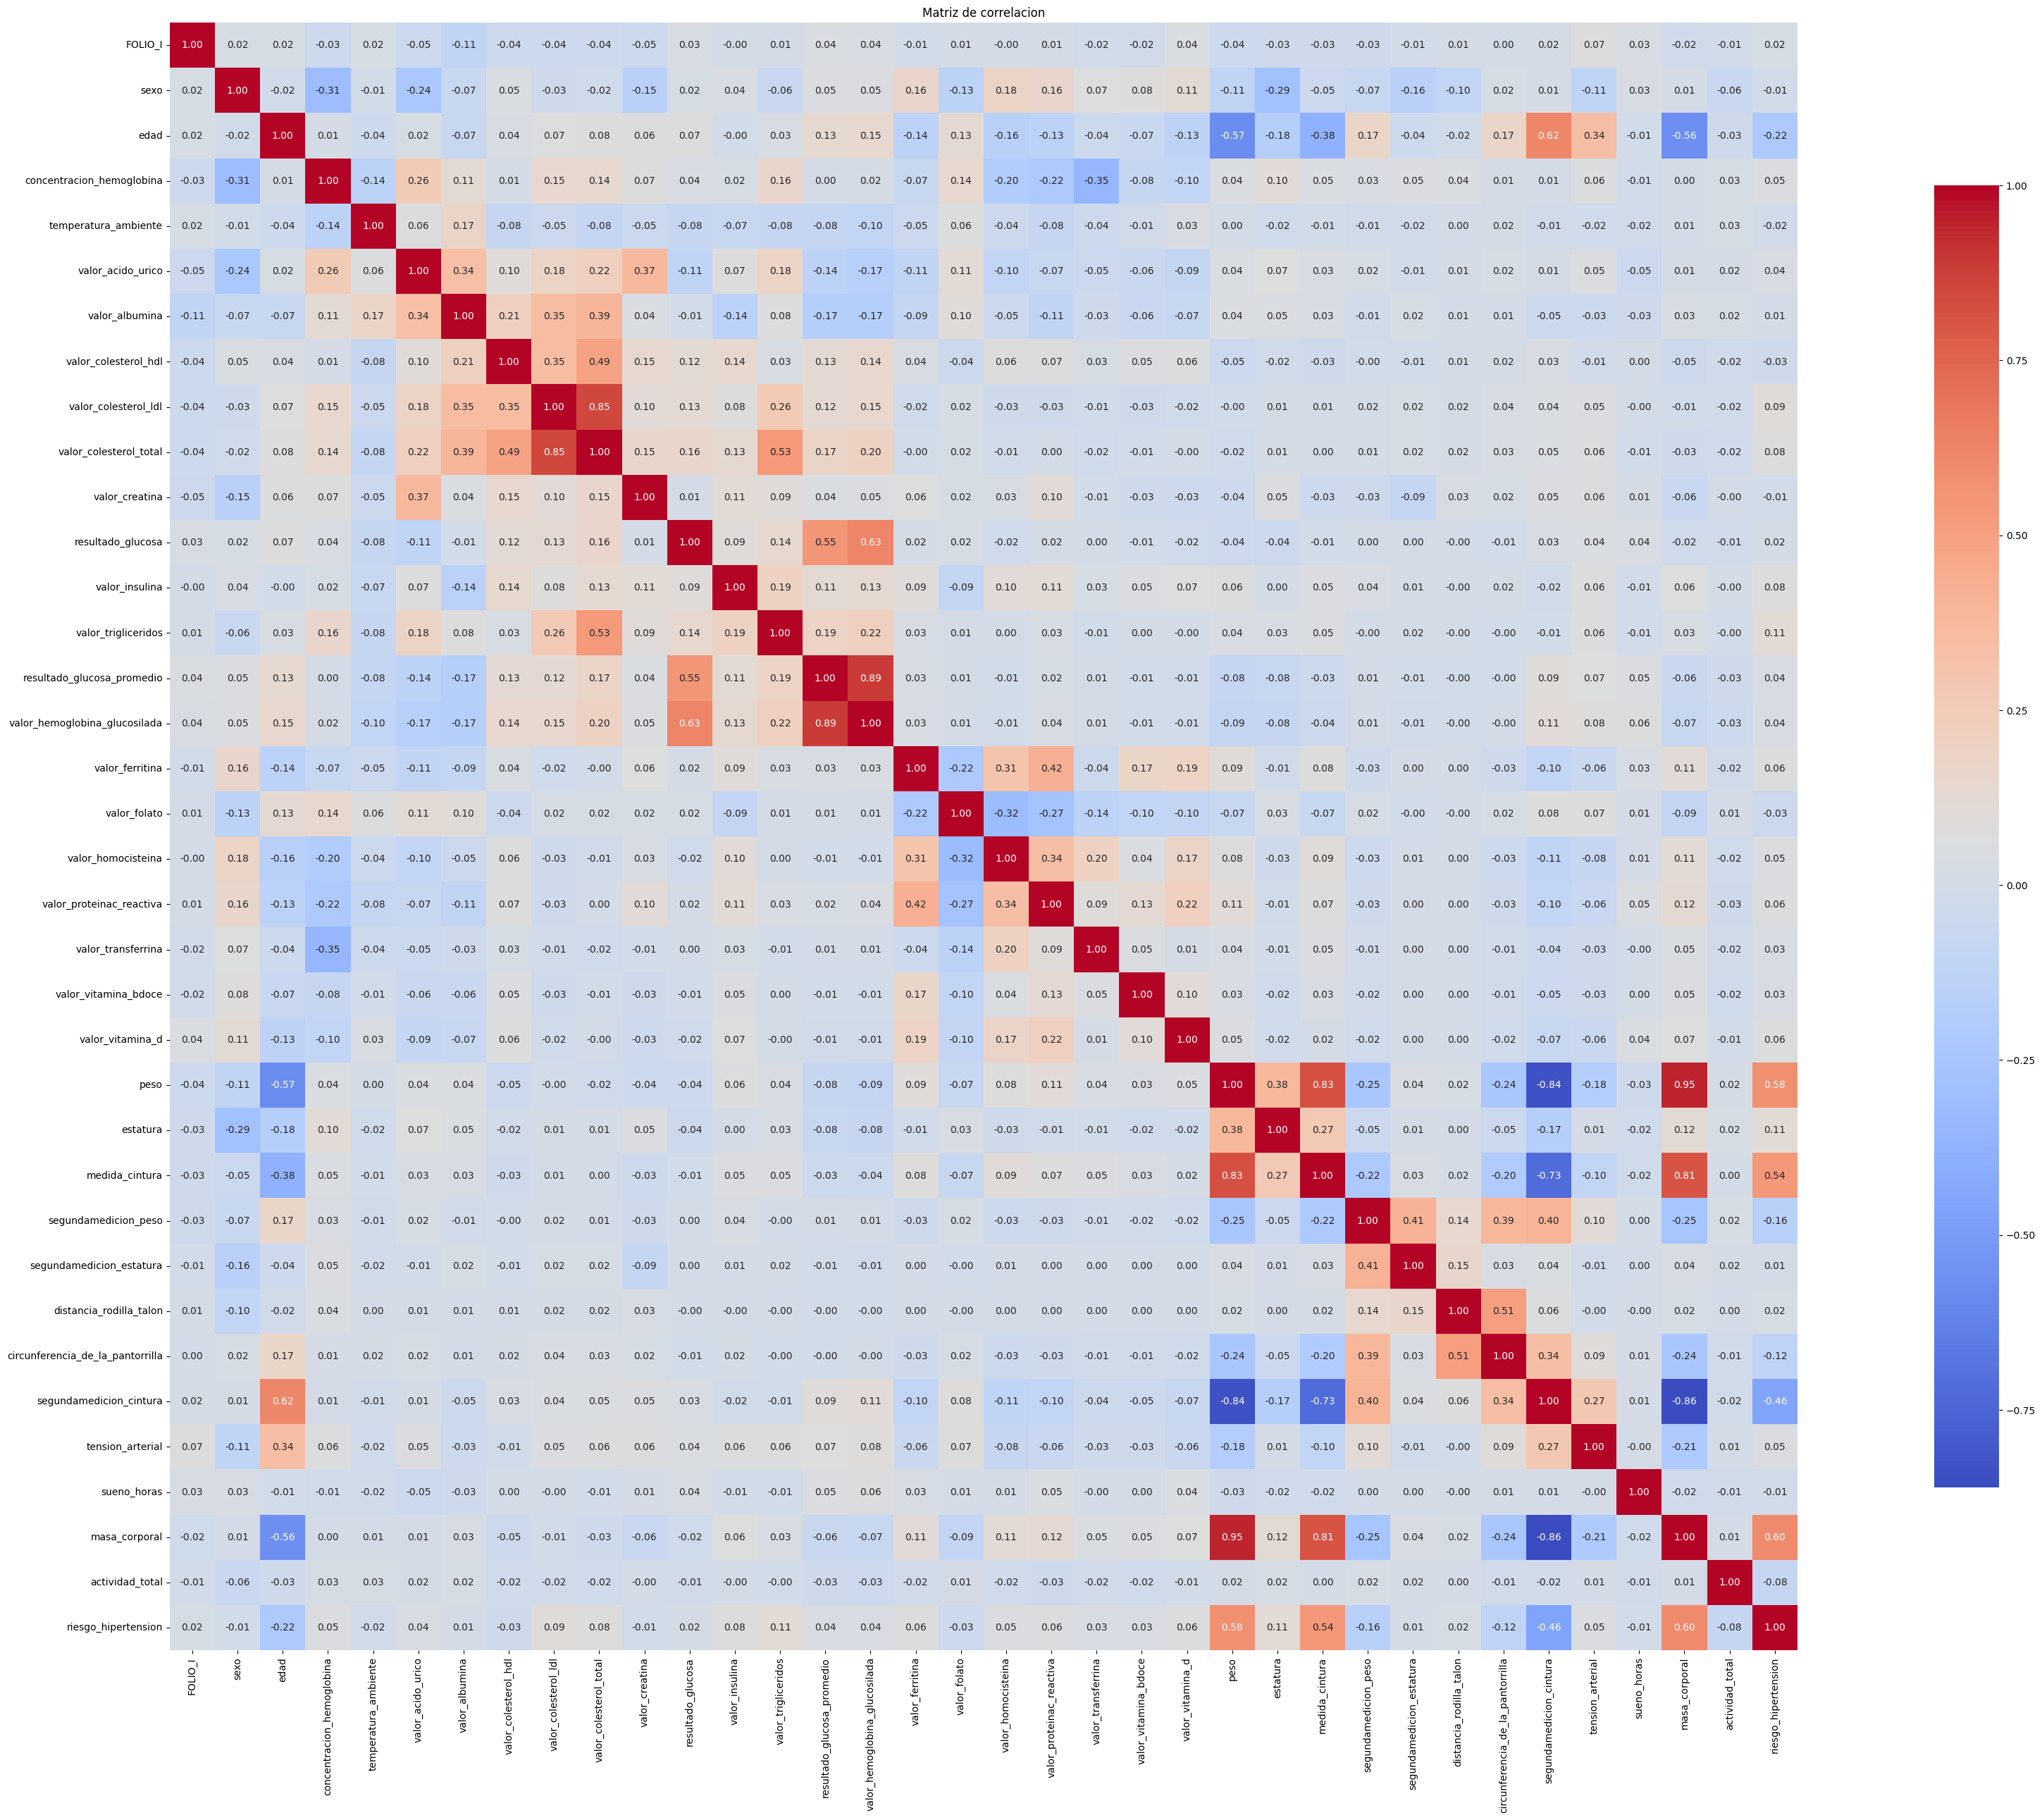

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

matriz_de_correlacion = df.corr()
plt.figure(figsize =(50, 30))
sns.heatmap(matriz_de_correlacion, annot = True, cmap = 'coolwarm', fmt = ".2f", square = True, cbar_kws = {"shrink": 0.8})
plt.title('Matriz de correlacion')
plt.show()

Coeficiente de correlacion:  0.1072



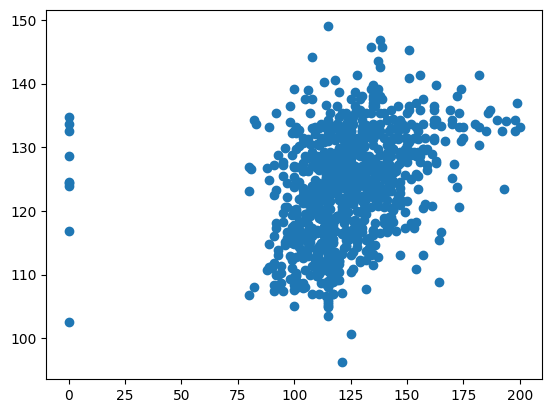

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import statsmodels.api as sm
import matplotlib.pyplot as plt


X = df[['edad',	'sexo',	'peso',	'estatura']]
Y = df["tension_arterial"]

#Datos de entrenamiento y datos de prueba

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

X_train_constante = sm.add_constant(X_train)
X_test_constante = sm.add_constant(X_test)

modelo = sm.OLS(Y_train, X_train_constante).fit()


Yc = modelo.predict(X_test_constante)

plt.scatter(Y_test, Yc)

r2 = r2_score(Y_test, Yc)
print(f'Coeficiente de correlacion: {r2: 0.4f}\n')

**Hipótesis**
---
Se plantea que un mayor consumo de bebidas azucaradas, junto con bajos niveles de actividad física y una predisposición genética a la obesidad (evidenciada por antecedentes familiares), están relacionados con un aumento en el índice de masa corporal (IMC).



**"Regresión ajustada"**

In [5]:
import pandas as pd
import statsmodels.api as sm

variable_dependiente = df['tension_arterial']
variables_independientes = df[['edad',	'sexo',	'peso',	'estatura']]

variables_independientes = sm.add_constant(variables_independientes)

modelo = sm.OLS(variable_dependiente, variables_independientes)
resultados = modelo.fit()

print(resultados.summary())

                            OLS Regression Results                            
Dep. Variable:       tension_arterial   R-squared:                       0.132
Model:                            OLS   Adj. R-squared:                  0.131
Method:                 Least Squares   F-statistic:                     165.9
Date:                Sat, 12 Apr 2025   Prob (F-statistic):          2.15e-132
Time:                        23:48:20   Log-Likelihood:                -19486.
No. Observations:                4363   AIC:                         3.898e+04
Df Residuals:                    4358   BIC:                         3.901e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         95.3477      4.408     21.629      0.0

**"Coeficiente de determinación"**

In [6]:

import pandas as pd
import statsmodels.api as sm


variable_dependiente = df['tension_arterial']
variables_independientes = df[['edad',	'sexo',	'peso',	'estatura']]


variables_independientes = sm.add_constant(variables_independientes)

modelo = sm.OLS(variable_dependiente, variables_independientes)
resultados = modelo.fit()

r_cuadrado = resultados.rsquared

print(f"El coeficiente de determinación (R-cuadrado) es: {r_cuadrado}")

print(resultados.summary())

El coeficiente de determinación (R-cuadrado) es: 0.13214862228394375
                            OLS Regression Results                            
Dep. Variable:       tension_arterial   R-squared:                       0.132
Model:                            OLS   Adj. R-squared:                  0.131
Method:                 Least Squares   F-statistic:                     165.9
Date:                Sat, 12 Apr 2025   Prob (F-statistic):          2.15e-132
Time:                        23:48:59   Log-Likelihood:                -19486.
No. Observations:                4363   AIC:                         3.898e+04
Df Residuals:                    4358   BIC:                         3.901e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------

El modelo tiene capacidad explicativa limitada.

Edad, sexo y estatura tienen efectos estadísticamente significativos sobre la tensión arterial.

Peso no muestra una influencia significativa en este análisis.

**"Linealidad, normalidad, homoscedasticidad"**

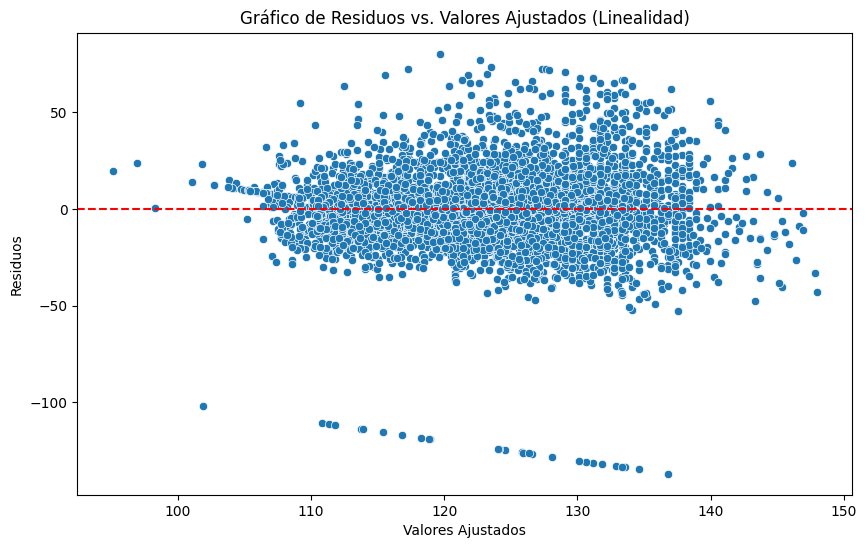

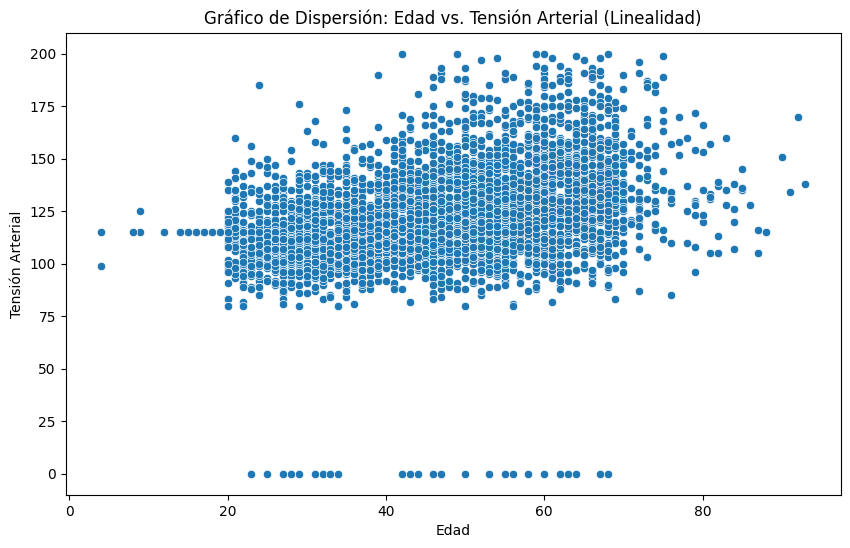

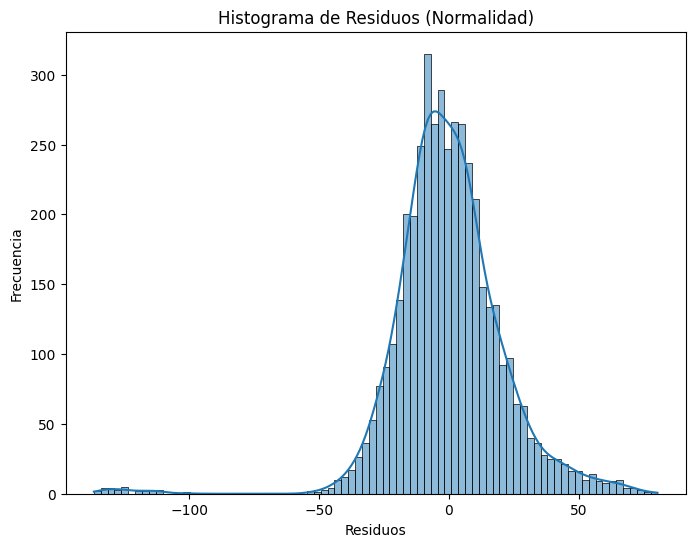

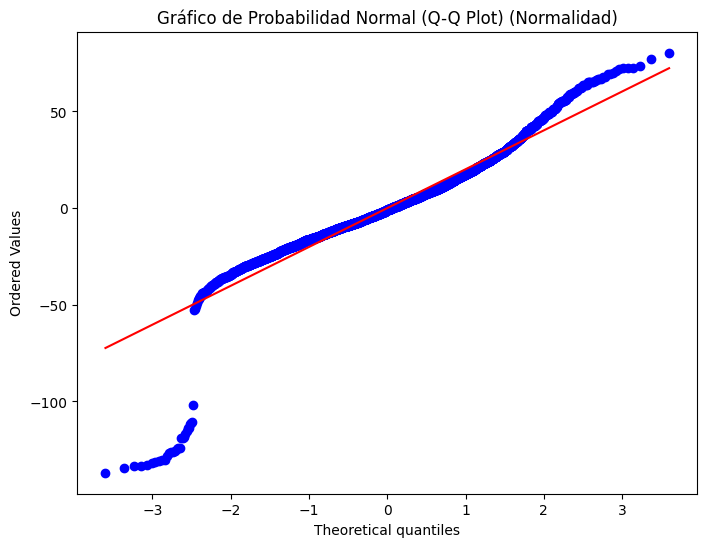


Prueba de Shapiro-Wilk: Estadístico = 0.909, p-valor = 0.000


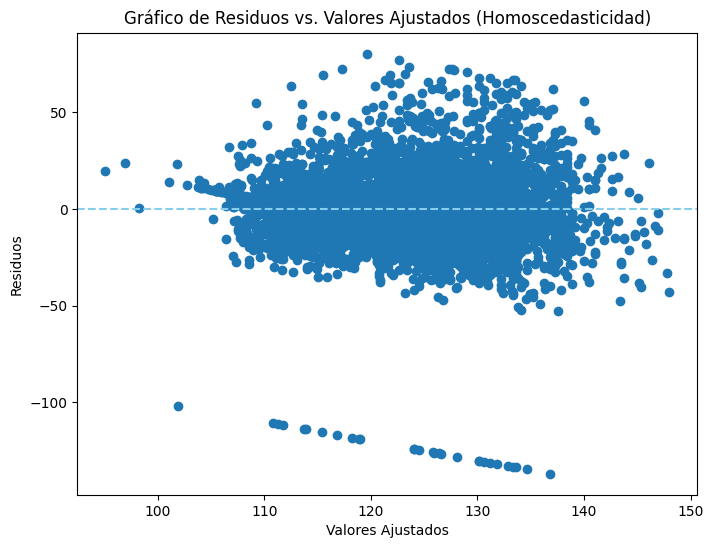

In [9]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns

variable_dependiente = df['tension_arterial']
variables_independientes = df[['edad',	'sexo',	'peso',	'estatura']]

# --- 1. Linealidad ---

plt.figure(figsize=(10, 6))
sns.scatterplot(x=resultados.fittedvalues, y=resultados.resid)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Valores Ajustados")
plt.ylabel("Residuos")
plt.title("Gráfico de Residuos vs. Valores Ajustados (Linealidad)")
plt.show()


plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['edad'], y=df['tension_arterial'])
plt.xlabel("Edad")
plt.ylabel("Tensión Arterial")
plt.title("Gráfico de Dispersión: Edad vs. Tensión Arterial (Linealidad)")
plt.show()

# --- 2. Normalidad de los Residuos ---


plt.figure(figsize=(8, 6))
sns.histplot(resultados.resid, kde=True)
plt.xlabel("Residuos")
plt.ylabel("Frecuencia")
plt.title("Histograma de Residuos (Normalidad)")
plt.show()


plt.figure(figsize=(8, 6))
stats.probplot(resultados.resid, dist="norm", plot=plt)
plt.title("Gráfico de Probabilidad Normal (Q-Q Plot) (Normalidad)")
plt.show()

shapiro_test = stats.shapiro(resultados.resid)
print(f"\nPrueba de Shapiro-Wilk: Estadístico = {shapiro_test.statistic:.3f}, p-valor = {shapiro_test.pvalue:.3f}")

# --- 3. Homoscedasticidad (Varianza Constante de los Residuos) ---

plt.figure(figsize=(8, 6))
plt.scatter(resultados.fittedvalues, resultados.resid)
plt.axhline(0, color='skyblue', linestyle='--')
plt.xlabel("Valores Ajustados")
plt.ylabel("Residuos")
plt
plt.title("Gráfico de Residuos vs. Valores Ajustados (Homoscedasticidad)")
plt.show()

*CONCLUSIÓN*


---

En resumen, el análisis de residuos revela problemas importantes en el modelo de regresión lineal. Aunque la linealidad podría no ser un problema grave, la posible falta de linealidad entre las variables y, sobre todo, la clara falta de normalidad en la distribución de los residuos son preocupantes. Estas violaciones de los supuestos pueden comprometer la confiabilidad de las pruebas de hipótesis, los intervalos de confianza y las predicciones del modelo.



---

